In [1]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D

### 1. Загрузка данных

In [30]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

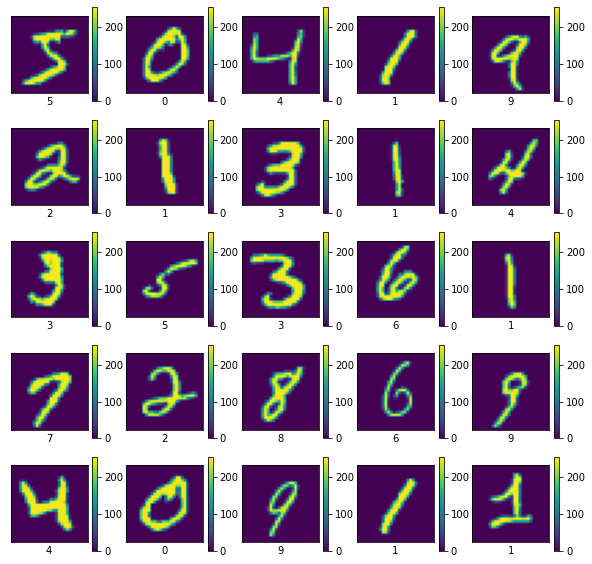

In [31]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i])
    plt.colorbar()
    plt.xlabel(y_train[i])
    plt.grid(False)

In [32]:
def plot_MNIST_samples(image_data, label_data, classes,  N=8):
    plt.figure(figsize=(10,N))
    num_classes = len(classes)
    for i, y in enumerate(classes):
        idxs = np.flatnonzero(label_data == y)
        idxs = np.random.choice(idxs, N, replace=False)
        for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y + 1
            plt.subplot(N, num_classes, plt_idx)
            plt.imshow(image_data[idx], cmap='gray')
            plt.axis('off')
            if i == 0:
                plt.title(str(y))
    plt.show()

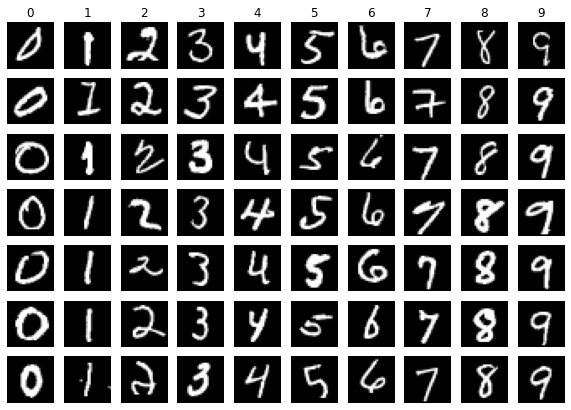

In [33]:
classes = list(range(0,10))
plot_MNIST_samples(X_train, y_train, classes, N=7)

In [34]:
X_train.shape

(60000, 28, 28)

In [35]:
X_test.shape

(10000, 28, 28)

### 2. Подготовка данных 

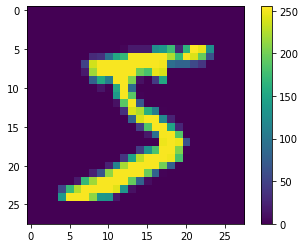

In [36]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)

In [37]:
print("Цифра:",  y_train[0])

Цифра: 5


In [41]:
# Значения пикселей находятся в диапазоне от 0 до 255. 
# масштабируем эти значения к диапазону от 0 до 1

In [39]:
X_train = X_train / 255.0
X_test = X_test / 255.0

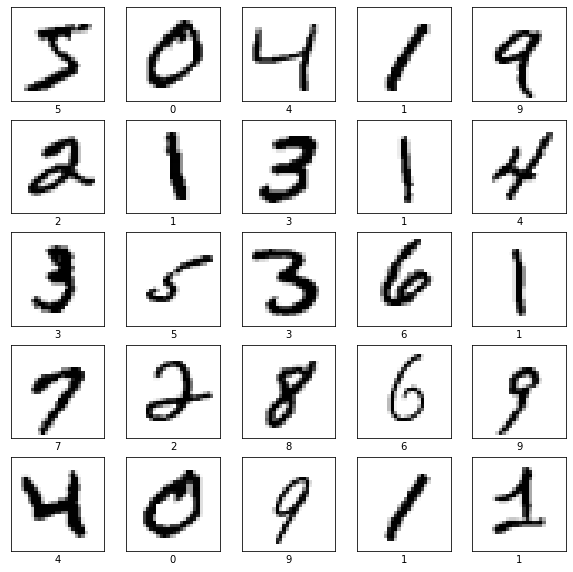

In [42]:
# проверим: выведем первые 25 элементов
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

### 3. Создание модели для обучения

Sequential здесь означает последовательный тип модели, в который мы добавляем слои друг за другом. Инициализируем модель:

In [43]:
# настроим слои
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [44]:
# compile модели
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 4. Обучение модели
**Тренировка с указанием данных, числа эпох и размера подвыборки** 

In [45]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2561 - accuracy: 0.9263
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1146 - accuracy: 0.9665
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0794 - accuracy: 0.9759
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0592 - accuracy: 0.9815
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0468 - accuracy: 0.9857
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0363 - accuracy: 0.9885
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0284 - accuracy: 0.9911
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0239 - accuracy: 0.9923
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0180 - accuracy: 0.9944
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.016

In [54]:
model.save('final_model.h5')

In [48]:
# Еще можно посмотреть на нашу модель в целом: сколько в ней слоев, сколько параметров у каждого слоя с помощью команды model.summary()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### 5. Валидация качества модели на тестовых данных.

In [49]:
# оценка точности
test_loss, test_acc = model.evaluate(X_train, y_train, verbose=2)

print('\nТочность на проверочных данных:', test_acc)

1875/1875 - 3s - loss: 0.0120 - accuracy: 0.9964

Точность на проверочных данных: 0.9963833093643188


Что это означает: для нашей модели на основе нейронной сети мы получаем точность 99,6% - то есть, с вероятностью 99,6% модель определяет, какая цифра нарисована на картинке

### 6. Проверка

In [51]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

In [76]:
# загрузить изображение
def load_image(filename):
    img = load_img(filename, grayscale=True, target_size=(28, 28))
    # конвертировать в массив
    img = img_to_array(img)
    img = img.reshape(1, 28, 28, 1)
    img = img.astype('float32')
    img = img / 255.0
    return img

In [77]:
# загрузить изображение и предсказать
def run_example(filename):
    img = load_image(filename)
    model = load_model('final_model.h5')
    # predict the class
    digit = model.predict_classes(img)
    print(digit[0])

In [78]:
run_example('1.png')

1


In [79]:
run_example('2.png')

2


In [80]:
run_example('3.png')

3
